In [52]:
import numpy as np

import pandas
import matplotlib.pyplot as plt
data = pandas.read_csv('gbm-data.csv')
print(data)

      Activity        D1        D2    D3   D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   
...        ...       ...       ...   ...  ...       ...       ...       ...   
3746         1  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659   
3747         1  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876   
3748         0  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341   
3749         1  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713   
3750         0  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667   

            D8        D9  ...  D1767  D1768  D1769 

In [3]:
print(len(data))
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss

3751


In [4]:
target = data['Activity']
signs = data.loc[:, 'D1':'D1776']
#print(target)
#print(signs)
X = np.array(signs).transpose()
y = np.array(target)
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(signs, target, test_size=0.8, random_state=241)

[[0.         0.36666667 0.0333     ... 0.2        0.1        0.13333333]
 [0.49700901 0.60629148 0.48012427 ... 0.52056377 0.7656462  0.53395198]
 [0.1        0.05       0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1 1 1 ... 0 1 0]


In [29]:
print(y_test)
from pandas.core.common import flatten

3330    1
1793    0
2594    1
1903    1
3354    1
       ..
2872    0
2719    1
2861    0
2738    0
1421    0
Name: Activity, Length: 3001, dtype: int64


In [37]:
#попытки изобрести велосипед
from sklearn.ensemble import GradientBoostingClassifier
loss = []
values = [1, 0.5, 0.3, 0.2, 0.1]
#for i in values:
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = 1)
clf.fit(X_train, y_train)
#print(np.stack(list(clf.staged_decision_function(X_test))))
stack = np.stack(list(clf.staged_decision_function(X_test)))
for l in stack:
    y_pred = list(flatten(l))
#print(l)
    print(y_pred)
    sigma_pred = 1/(1+np.exp(y_pred))
    #print(len(y_pred))
    loss.append(log_loss(y_test, sigma_pred))
    print(loss)


      Iter       Train Loss   Remaining Time 
         1           1.0190           10.33s
         2           0.9192           10.03s
         3           0.8272            9.93s
         4           0.7834            9.73s
         5           0.7109            9.66s
         6           0.6368            9.82s
         7           0.5797            9.75s
         8           0.5610            9.70s
         9           0.5185            9.65s
        10           0.4984            9.58s
        20           0.1999            9.21s
        30           0.1313            8.96s
        40           0.0790            8.63s
        50           0.0511            8.15s
        60           0.0352            7.72s
        70           0.0245            7.28s
        80           0.0162            6.86s
        90           0.0114            6.52s
       100           0.0077            6.10s
       200           0.0002            1.99s
[0.6036603606465477, -0.13348184577767191, 1.172572908

[0.6706531525273637, 5.9762028864330805, -4.3550901356580525, 3.1828285515864865, 2.404700093475534, 4.941907820706392, -4.213516225414164, -1.7694320040347813, -0.41738086521970624, 4.367986338249071, 2.327692979052659, -1.5128875253127456, 1.4704096388129448, -1.6122628922222586, -0.3091590287773267, -2.50292843894292, -3.340817071944709, -0.9040922844030106, 1.0572842430935043, -1.6765162562313025, -3.1654786482134254, 4.56110806665716, -3.3346395479640676, 0.8210872943369346, -2.104995613966776, 1.0629850892930548, -2.6816117415168277, -5.287024883741632, 1.8618746627955818, -2.0218954045605595, 8.77801098689198, 2.012826161691824, 1.480513688313214, -4.603383784302018, 3.1186691037056296, 4.008621406641143, 4.523270917321817, -1.7682480160600946, -3.285104566572015, 3.24467760004066, -1.355001280828605, -1.1093218568626508, 4.179294339645994, 2.4702243956853955, 0.2541247505092299, -0.40546758138835226, -2.9123543017936226, -2.437170429633592, 5.520193627138301, -2.199452880626456

[1.1239798382757873, 1.2692954094593378, 1.3360529750785706, 1.4018836048188086, 1.4641010016481097, 1.5137547653460124, 1.566292854943546, 1.5926835023465031, 1.6323065292328158, 1.6892881578201755, 1.7234866577611474, 1.7797510895447521, 1.859536181126964, 1.8827808500756011, 1.9168091960329534, 1.9871140410774883, 2.037230037993432, 2.05114544991802, 2.162418024716067, 2.20526213648369, 2.2128666601524043, 2.2171390194379508, 2.2221464823474424, 2.2478193278684073, 2.2485422225817437, 2.273219652683199, 2.304547150189037, 2.3015960941855047, 2.303978499373386, 2.410812700089889]
[1.3338566559901337, 4.642304934790236, -3.975031494680212, 4.802911474593466, 3.0427232564646562, 4.6033286260077695, -5.190559601627701, -1.62342749828617, 0.03918271710514458, 4.842438828675794, 2.261220924126123, -2.270039524469924, 1.75494964600807, -0.9742397292331361, -0.6477382234759491, -6.461491113172047, -3.131017699333229, -0.2851411157373997, 1.1930158315946358, -0.9330224775312931, -2.614205559

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      Iter       Train Loss   Remaining Time 
         1           1.0190           10.75s
         2           0.9192           10.26s
         3           0.8272           10.03s
         4           0.7834            9.87s
         5           0.7109           11.35s
         6           0.6368           11.72s
         7           0.5797           12.17s
         8           0.5610           11.86s
         9           0.5185           11.73s
        10           0.4984           11.48s
        20           0.1999           10.43s
        30           0.1313            9.93s
        40           0.0790            9.38s
        50           0.0511            8.83s
        60           0.0352            8.32s
        70           0.0245            7.88s
        80           0.0162            7.43s
        90           0.0114            6.96s
       100           0.0077            6.50s
       200           0.0002            2.15s


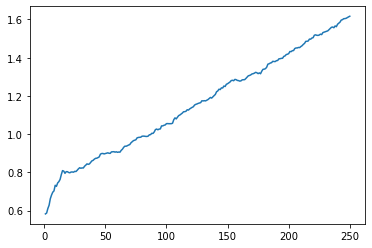

      Iter       Train Loss   Remaining Time 
         1           1.1255           11.73s
         2           1.0035           11.62s
         3           0.9386           12.51s
         4           0.8844           11.94s
         5           0.8381           11.57s
         6           0.7995           11.22s
         7           0.7559           10.91s
         8           0.7205           10.69s
         9           0.6958           10.49s
        10           0.6725           10.33s
        20           0.4672           10.07s
        30           0.3179            9.78s
        40           0.2274            9.33s
        50           0.1774            8.90s
        60           0.1394            8.35s
        70           0.1050            7.78s
        80           0.0805            7.35s
        90           0.0650            6.94s
       100           0.0511            6.52s
       200           0.0058            2.14s


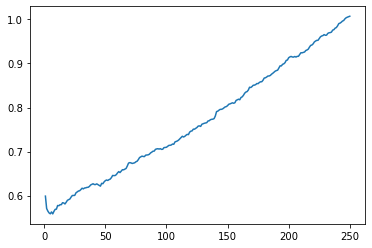

      Iter       Train Loss   Remaining Time 
         1           1.2095           10.73s
         2           1.1006           10.32s
         3           1.0240           11.54s
         4           0.9729           10.98s
         5           0.9387           10.68s
         6           0.8948           10.60s
         7           0.8621           10.46s
         8           0.8360           10.30s
         9           0.8171           10.15s
        10           0.7883           10.06s
        20           0.6029            9.82s
        30           0.4760            9.42s
        40           0.3879            8.99s
        50           0.3325            8.57s
        60           0.2759            8.08s
        70           0.2304            7.64s
        80           0.1969            7.20s
        90           0.1718            6.79s
       100           0.1404            6.38s
       200           0.0358            2.19s


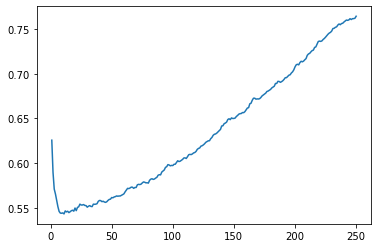

      Iter       Train Loss   Remaining Time 
         1           1.2613           12.36s
         2           1.1715           12.93s
         3           1.1009           12.09s
         4           1.0529           13.17s
         5           1.0130           12.48s
         6           0.9740           11.95s
         7           0.9475           11.54s
         8           0.9197           11.32s
         9           0.8979           11.05s
        10           0.8730           10.92s
        20           0.7207           10.00s
        30           0.6055            9.51s
        40           0.5244            9.19s
        50           0.4501            8.75s
        60           0.3908            8.26s
        70           0.3372            7.80s
        80           0.3009            7.37s
        90           0.2603            6.98s
       100           0.2327            6.56s
       200           0.0835            2.20s


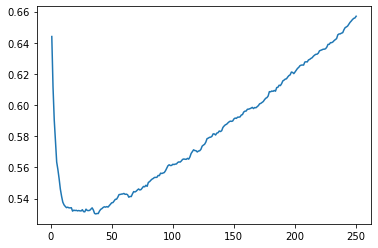

AttributeError: 'list' object has no attribute 'min'

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
values = [1, 0.5, 0.3, 0.2, 0.1]
for i in values:
    loss = []
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = i)
    clf.fit(X_train, y_train)
    for l in clf.staged_decision_function(X_test):
    #print(y_pred)
        y_pred = np.asarray(list(flatten(l)))
        sigma_pred = 1/(1+np.exp(-y_pred))
    #print(y_pred)
        loss.append(log_loss(y_test, sigma_pred))
    k = len(loss) 
    X = np.linspace(1, k, k)
    plt.plot(X, loss)
    plt.show()
    if i == 0.2:
        print(loss.min())
        print(loss.index(loss.min()))


In [65]:
loss = []
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = 0.2)
clf.fit(X_train, y_train)
for l in clf.staged_decision_function(X_test):
    #print(y_pred)
    y_pred = np.asarray(list(flatten(l)))
    sigma_pred = 1/(1+np.exp(-y_pred))
    #print(y_pred)
    loss.append(log_loss(y_test, sigma_pred))
print(min(loss))
print(loss.index(min(loss)))

      Iter       Train Loss   Remaining Time 
         1           1.2613           10.63s
         2           1.1715           10.26s
         3           1.1009           10.12s
         4           1.0529            9.93s
         5           1.0130           10.00s
         6           0.9740            9.97s
         7           0.9475            9.89s
         8           0.9197            9.90s
         9           0.8979           10.00s
        10           0.8730           10.67s
        20           0.7207            9.63s
        30           0.6055            9.23s
        40           0.5244            8.89s
        50           0.4501            8.53s
        60           0.3908            8.12s
        70           0.3372            7.67s
        80           0.3009            7.20s
        90           0.2603            6.78s
       100           0.2327            6.33s
       200           0.0835            2.12s
0.5301645204906471
36


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
clf = RandomForestClassifier(n_estimators = 36, random_state=241)
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)
print(pred)
print(log_loss(y_test, pred))

[[0.30555556 0.69444444]
 [0.77777778 0.22222222]
 [0.61111111 0.38888889]
 ...
 [0.63888889 0.36111111]
 [0.69444444 0.30555556]
 [0.27777778 0.72222222]]
0.5415685811957381
